In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
dataset=pd.read_csv(r'C:\Users\suman\Downloads\ass\ass4\delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
dataset.sorting_time=np.sqrt(dataset.sorting_time)

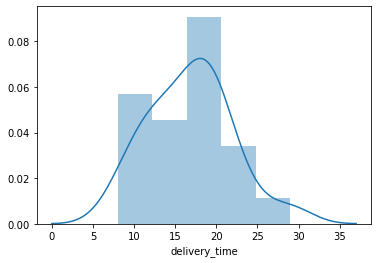

In [6]:
sns.distplot(dataset['delivery_time'])

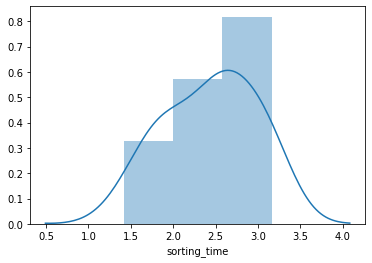

In [7]:
 sns.distplot(dataset['sorting_time'])

In [8]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.00000,0.83415
sorting_time,0.83415,1.00000


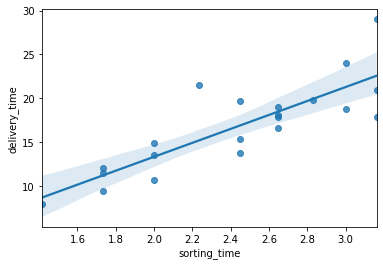

In [9]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [10]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [11]:
model.tvalues , model.pvalues

(Intercept      -0.840911
 sorting_time    6.592434
 dtype: float64,
 Intercept       0.410857
 sorting_time    0.000003
 dtype: float64)

In [12]:
model.rsquared , model.rsquared_adj

(0.695806227630867, 0.6797960290851232)

In [13]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [14]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [15]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [16]:
model.predict(data_pred)

0    37.164117
1    60.973889
dtype: float64